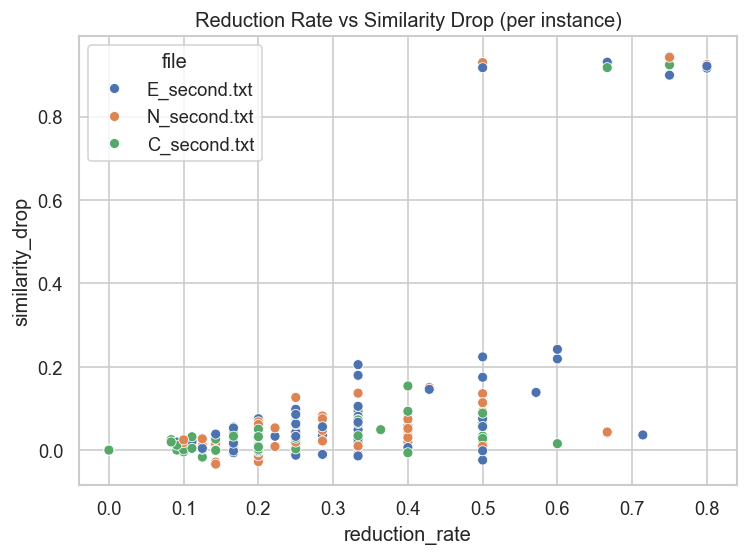

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("../summary_sentence_embedding.csv")

sns.scatterplot(data=df, x="reduction_rate", y="similarity_drop", hue="file")
plt.title("Reduction Rate vs Similarity Drop (per instance)")
plt.tight_layout()
plt.savefig("reduction_vs_similarity_drop.png")



In [ ]:
# average and distribution of scores
import json
import matplotlib.pyplot as plt
import seaborn as sns

with open('../scores.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

values = list(data.values())

average = sum(values) / len(values)
print(f"Average: {average:.4f}")

plt.figure(figsize=(8, 5))
sns.histplot(values, bins=10, kde=True)

plt.axvline(average, color='red', linestyle='--', label=f'Average: {average:.4f}')
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

labels = ["E", "N", "C"]
stages = ["Original", "Correctness", "Lexical", "Syntactic", "Semantic"]
colors = ["#4C72B0", "#DD8452", "#55A868"]
models = {
    "LLaMA-3.3-70B-Instruct": [[1289, 1476, 1274], [1278, 1469, 1259], [1278, 1469, 1259], [1278, 1469, 1256], [1263, 1454, 1252]],
    "LLaMA-3.1-8B-Instruct":  [[2823, 3092, 2969], [2821, 3091, 2969], [2795, 3033, 2925], [2641, 2841, 2768], [2470, 2716, 2648]],
    "GPT-4.1-Instruct":       [[857, 1326, 1095], [692, 1326, 1064], [692, 1326, 1064], [691, 1325, 1064], [685, 1314, 1060]]
}

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 9))
axes = axes.flatten()

for ax, (model_name, counts) in zip(axes, models.items()):
    arr = np.array(counts, dtype=float)
    sums = arr.sum(axis=1)
    percentages = arr / sums[:, None] * 100
    bottom = np.zeros(len(stages))

    for i, (label, color) in enumerate(zip(labels, colors)):
        bars = ax.bar(stages, percentages[:, i], label=label, bottom=bottom, color=color, edgecolor='white', linewidth=1)
        for j, bar in enumerate(bars):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2,
                    bar.get_y() + height / 2,
                    f"{height:.1f}%",
                    ha='center', va='center',
                    color='white' if height > 15 else 'black',
                    fontsize=9, weight='bold')
        bottom += percentages[:, i]

    for j, total in enumerate(sums):
        ax.text(j, 106, f"Total: {int(total)}", ha='center', va='bottom', fontsize=9, style='italic')
    for j in range(1, len(sums)):
        delta = int(sums[j - 1] - sums[j])
        ax.text(j, 100, f"-{delta}", ha='center', va='bottom', fontsize=9, color='red', style='italic')


    ax.set_title(f"Label Distribution ({model_name})", weight='bold', pad=10, fontsize = 10)
    ax.set_ylabel("Percentage (%)", fontsize=10)
    ax.set_ylim(0, 110)
    ax.set_xticks(np.arange(len(stages)))
    ax.set_xticklabels(stages, fontweight='bold')
    ax.tick_params(axis='both', labelsize=9)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.spines[['top', 'right']].set_visible(False)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Label", loc='lower center', ncol=3, frameon=False, bbox_to_anchor=(0.5, 0))

plt.tight_layout(h_pad=3.0, rect=[0, 0.05, 1, 1])
plt.savefig("../label_distribution.pdf", bbox_inches="tight", dpi=300)
plt.show()
